#Homework 4

##Problem 1

Evaluate the following integrals using
(a) Trapezoidial rule
(b) Simpson's rule
(c) Gaussian quadrature

For the following functions

$\int$
(1) $∫_0^{\pi/2} cos(x) dx$

(2) $∫_1^3 \frac{1}{x^2} dx$

(3) $∫_2^4 x^2+x+1 dx $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

a1,b1,N = 0,pi/2,1000
a2,b2 = 1,3
a3,b3 = 2,4

def func1(x):
  return np.cos(x)
def func2(x):
  return 1/x**2
def func3(x):
  return x**2 + x + 1

h1 = (b1 - a1)/float(N-1)

integral1 = 0
integral2 = 0
integral3 = 0

for i in range(N+1):
  x_i = a1 + (i-1) * h1
  if i == 0 or i == N:
    integral1 += func1(x_i)/2
  else:
    integral1 += func1(x_i)
integral1 *= h1
print(integral1)

h2 = (b2-a2)/float(N-1)

for i in range(N+1):
  x_i = a2 + (i-1) * h2
  if i == 0 or i == N:
    integral2 += func2(x_i)/2
  else:
    integral2 += func2(x_i)
integral2 *= h2
print(integral2)

h3 = (b3-a3)/float(N-1)

for i in range(N+1):
  x_i = a3 + (i-1) * h3
  if i == 0 or i == N:
    integral3 += func3(x_i)/2
  else:
    integral3 += func3(x_i)
integral3 *= h3
print(integral3)


1.0015721616950135
0.6686733320096188
26.68067200066669


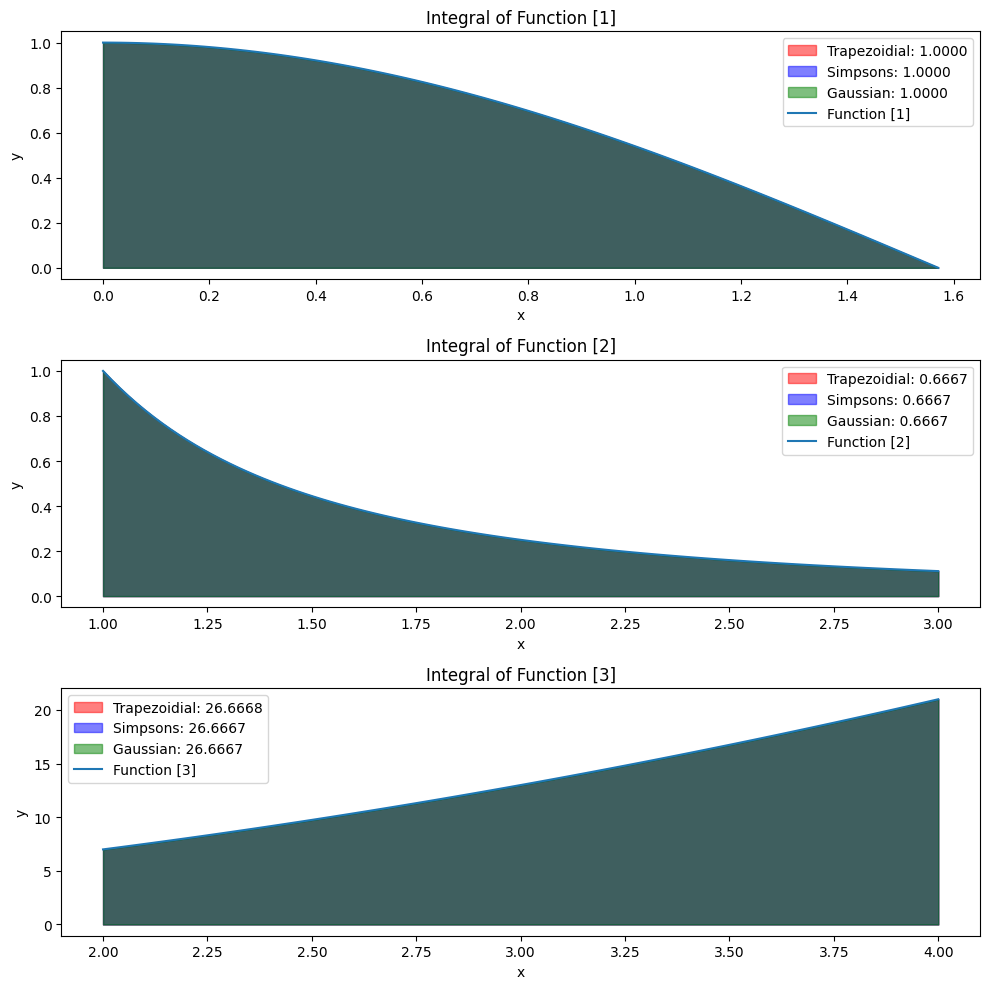

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.integrate import trapz,simps,quad

def f1(x):
  return np.cos(x)
def f2(x):
  return 1/x**2
def f3(x):
  return x**2+x+1

limits = [(0,pi/2),(1,3),(2,4)]
functions = [f1,f2,f3]
x_vals = np.linspace(0,4,100)

fig, ax = plt.subplots(3, figsize=(10,10))

for i in range(3):
  a,b = limits[i]
  x = np.linspace(a,b,100)
  y = functions[i](x)

  #Trapezoidal Rule Integration
  trap_int = trapz(y,x)
  ax[i].fill_between(x,y, alpha=.5, color='red', label=f'Trapezoidial: {trap_int:.4f}')

  #Simpson's Rule Integral
  simps_int = simps(y,x)
  ax[i].fill_between(x,y,alpha=.5,color='blue',label=f'Simpsons: {simps_int:.4f}')

  #Gaussian Quadrature Integral
  gaus_int, _ = quad(functions[i],a,b)
  ax[i].fill_between(x,y,alpha=.5,color='green',label=f'Gaussian: {gaus_int:.4f}')

  ax[i].plot(x,y,label=f'Function {[i+1]}')
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('y')
  ax[i].legend(loc='best')
  ax[i].set_title(f'Integral of Function {[i+1]}')

plt.tight_layout()

fig.savefig("HW_4_Problem_1.png",bbox_inches='tight',dpi=300)


In [ ]:
#TrapMethods;  Trapezoid integration of a function
import numpy as np
from scipy.constants import pi
#Define the boundary values [a,b] and the number of intervals N
a, b, N = 0., pi/2, 10

def func(x):
    #f(x) is a function of x
    #x is the independent variable
#    print(" x, f(x) = %1.1f, %1.1f" % (x,x*x))
    return np.cos(x)

def func_weight(i,h):
    #weights for the trapezoid rule
    if i==1 or i== N:
        weight = h/2.
    else:
        weight = h
    return weight

#width of each interval
h = (b-a)/float(N-1)
tot_sum = 0

for i in range(1,N+1):
   x_i = a + (i-1)*h
   tot_sum += func(x_i)*func_weight(i,h)

print(' Total sum = ', tot_sum)
print(" Analytical sum = ", (b**3/3.));

 Total sum =  0.9974602317917259
 Analytical sum =  1.2919281950124923


##Problem 2

Write a python program to study projectile motion without air resistance using Simpson's rule.



In [ ]:
import numpy as np
from scipy.integrate import simpson as simps
from scipy.constants import g,pi

def simp_integrate(func,a,b,N):
        #width of each interval
    h = (b-a)/float(N-1)
    tot_sum = 0

    for i in range(1,N):
        x_left = a + (i-1)*h
        x_right = a + i*h
        x_mid = x_left + h/2
        tot_sum += (h/6.)*(func(x_left)+4*func(x_mid)+func(x_right))
    return tot_sum

theta = np.linspace(0,pi/2,100000)

x_i = 0
y_i = 50
v_i = 200
#Initial Velocity Equations
def v_yi(theta):
  return v_i*np.sin(theta)
def v_xi(theta):
  return v_i*np.cos(theta)
def ay(t):
  return -g
#Velocity Functions
def v_x(t):
  return v_xi
def v_y(t):
  return simp_integrate(ay,0,t,100)+v_yi
#Position Equations
def x(t):
  return simp_integrate(v_x,0,t,100)
def y(t):
  return simp_integrate(v_y,0,t,100)+y_i

v_xi = v_xi(theta)
v_yi = v_yi(theta)

a = -0.5*g
b = v_yi
c = y_i

T=(-b-np.sqrt(b**2-4*a*c))/(2*a)
print(T)


[ 3.19329957  3.19361994  3.19394035 ... 41.03713471 41.03713473
 41.03713473]


In [ ]:
for i in range(len(theta)):
    if (x[i]<2057.1) and (x[i]>2056.9):
        Th=theta[i]
        print(i)
        print(x[i])
        print(T[i])
        print(Th)


TypeError: ignored

In [ ]:
import numpy as np
import math

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)

# Inputs
initial_height = 50
target_distance = 2057
initial_velocity = 200

# Calculate launch angle (theta) using the arctan formula
theta = math.degrees(math.atan((initial_velocity ** 2 + math.sqrt((initial_velocity ** 4) - (g * ((g * target_distance ** 2) + (2 * initial_height * initial_velocity ** 2)))))/(g * target_distance)))

# Calculate time of flight
time_of_flight = (2 * initial_velocity * np.sin(theta)) / -g

# Output results
print(f"Time of flight: {time_of_flight:.2f} seconds")
print(f"Launch angle (theta): {theta:.2f} degrees")


Time of flight: 24.95 seconds
Launch angle (theta): 74.74 degrees


Optimal launch angle: 15.454545454545455 degrees
Time of flight: 10.865395053620182 seconds
Maximum height: 194.76716285935058 meters


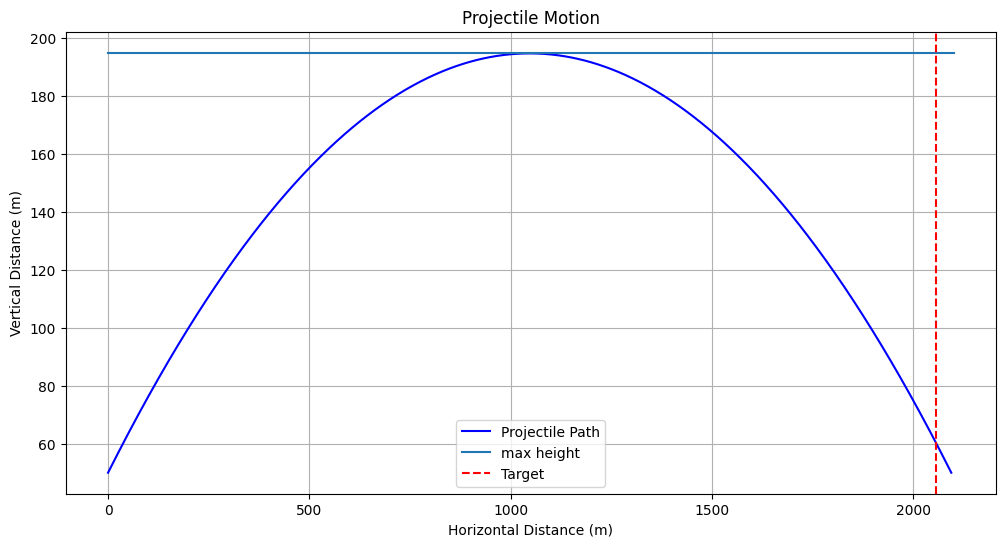

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
initial_velocity = 200.0  # Initial velocity (m/s)
target_distance = 2057.0  # Horizontal distance to target (m)
cannon_height = 50.0  # Cannon height above sea level (m)

# Function to calculate the horizontal distance to the target
def horizontal_distance(launch_angle_rad):
    return (initial_velocity**2 * np.sin(2 * launch_angle_rad)) / g

# Range of launch angles to explore (in degrees)
angles_deg = np.linspace(0, 90, 100)
angles_rad = np.deg2rad(angles_deg)

# Initialize variables to store results
min_distance_to_target = float('inf')
optimal_launch_angle_rad = 0.0
time_of_flight = 0.0
max_height = 0.0

# Calculate the optimal launch angle and associated values
for angle_rad in angles_rad:
    distance = horizontal_distance(angle_rad)
    if abs(distance - target_distance) < abs(min_distance_to_target - target_distance):
        min_distance_to_target = distance
        optimal_launch_angle_rad = angle_rad
        time_of_flight = (2 * initial_velocity * np.sin(optimal_launch_angle_rad)) / g
        max_height = (initial_velocity**2 * np.sin(optimal_launch_angle_rad)**2) / (2 * g)

# Convert the launch angle to degrees
optimal_launch_angle_deg = np.rad2deg(optimal_launch_angle_rad)

# Print the results
print(f"Optimal launch angle: {optimal_launch_angle_deg} degrees")
print(f"Time of flight: {time_of_flight} seconds")
print(f"Maximum height: {max_height+50} meters")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the trajectory
time_values = np.linspace(0, time_of_flight, 1000)
x_values = initial_velocity * np.cos(optimal_launch_angle_rad) * time_values
y_values = cannon_height + (initial_velocity * np.sin(optimal_launch_angle_rad) * time_values) - (0.5 * g * time_values**2)
plt.plot(x_values, y_values, label='Projectile Path', color='blue')

x = np.linspace(0,2100,100)
y = np.linspace(195,195,100)
plt.plot(x,y, label = 'max height')

# Plot the target
plt.axvline(x=target_distance, color='red', linestyle='--', label='Target')

plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Projectile Motion')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

th=np.arange(0,np.pi/2,.00005)
xi=0
yi=50
g=9.81
#Initial velocities given theta
def vyi(th):
    return 200*np.sin(th)
def vxi(th):
    return 200*np.cos(th)
#Callable acceleration function
def ay(t):
    return -g
#Velcity functions
def vx(t):
    return vx_i
def vy(t):
    return simp_integrate(ay,0,t,100)+vy_i
#Position functions
def xfunc(t):
    return simp_integrate(vx,0,t,100)
def yfunc(t):
    return simp_integrate(vy,0,t,100) +yi
#Initial velcoity components


vy_i=vyi(th)
vx_i=vxi(th)
#0=(yi-y)+vy_i*t-0.5*g*t**2
#Time of flight
a=-0.5*g
b=vy_i
c=-50
T=(-b-np.sqrt(b**2-4*a*c))/(2*a)
print(T)

x=xfunc(T)

[        nan         nan         nan ... 40.52316733 40.52316758
 40.52316773]


TypeError: ignored